# Retail Store Customer Segmentation Case Study

**Objective: To cluster the customers of the online store based on RFM (Recency, Frequency, Monetary).**

In [1]:
# Importing Libraries:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
# Reading the retail store data:
df=pd.read_csv('Downloads/Online+Retail.csv',sep=',',encoding='ISO-8859-1',header=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
df['amount']=df['Quantity']*df['UnitPrice']

In [7]:
mf=df.groupby('CustomerID')['amount'].sum()
mf=mf.reset_index()
mf

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [8]:
mf.isnull().sum()

CustomerID    0
amount        0
dtype: int64

In [9]:
freq=df.groupby('CustomerID')['amount'].count().reset_index()
freq

,CustomerID,amount
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [10]:
mf=pd.merge(mf,freq,on='CustomerID',how='inner')
mf.columns=['CustomerID','amount','freq']
mf

,CustomerID,amount,freq
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [11]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate,format='%d-%m-%Y %H:%M')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [13]:
max_date=max(df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
df['diff']=max_date - df['InvoiceDate']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [15]:
resency=df.groupby('CustomerID')['diff'].min()
resency=resency.reset_index()

In [16]:
resency['diff']=resency['diff'].dt.days
resency

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [17]:
mf=pd.merge(mf,resency,on='CustomerID',how='inner')
mf

,CustomerID,amount,freq,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [18]:
mf=mf.set_index('CustomerID',drop=True)
mf

,amount,freq,diff
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


In [19]:
mf.columns=['amount','freq','recency']
mf

,amount,freq,recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18280.0,180.60,10,277
18281.0,80.82,7,180
18282.0,176.60,13,7


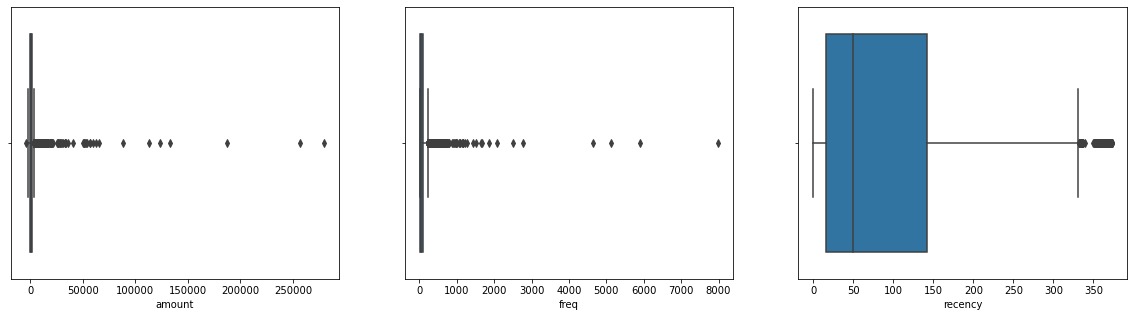

In [20]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.boxplot(mf.amount)

plt.subplot(1,3,2)
sns.boxplot(mf.freq)

plt.subplot(1,3,3)
sns.boxplot(mf.recency)
plt.show()

## Outlier treatment:

In [21]:
Q1=mf.amount.quantile(0.05)
Q2=mf.amount.quantile(0.95)
IQR=Q2-Q1
mf=mf[(mf.amount>=(Q1-(1.5*IQR))) & (mf.amount<=(Q2+(1.5*IQR)))]

Q1=mf.freq.quantile(0.05)
Q2=mf.freq.quantile(0.95)
IQR=Q2-Q1
mf=mf[(mf.freq>=(Q1-(1.5*IQR))) & (mf.freq<=(Q2+(1.5*IQR)))]

Q1=mf.recency.quantile(0.05)
Q2=mf.recency.quantile(0.95)
IQR=Q2-Q1
mf=mf[(mf.recency>=(Q1-(1.5*IQR))) & (mf.recency<=(Q2+(1.5*IQR)))]
final_mf=mf.copy()
mf

,amount,freq,recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18278.0,173.90,9,73
18280.0,180.60,10,277
18281.0,80.82,7,180


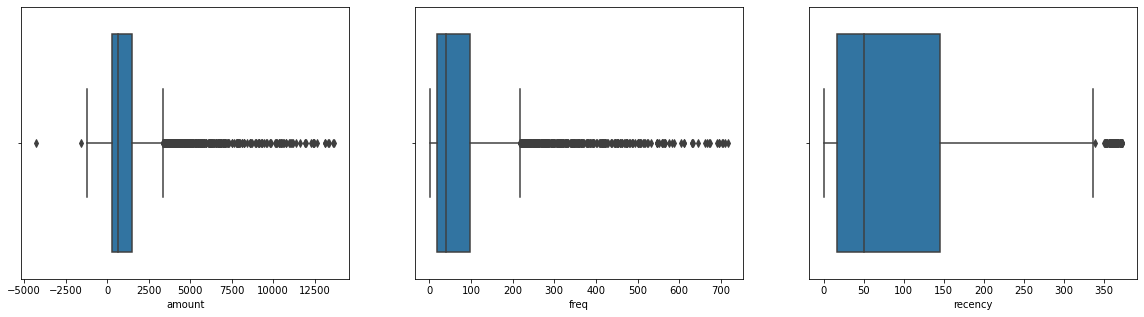

In [22]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.boxplot(mf.amount)

plt.subplot(1,3,2)
sns.boxplot(mf.freq)

plt.subplot(1,3,3)
sns.boxplot(mf.recency)
plt.show()

In [23]:
scaler=StandardScaler()
var=['amount','freq','recency']
mf[var]=scaler.fit_transform(mf[var])
mf

,amount,freq,recency
CustomerID,,,
12346.0,-0.723738,-0.752888,2.301611
12347.0,1.731617,1.042467,-0.906466
12348.0,0.300128,-0.463636,-0.183658
12349.0,0.277517,-0.044720,-0.738141
12350.0,-0.533235,-0.603275,2.143188
...,...,...,...
18278.0,-0.624669,-0.683068,-0.193560
18280.0,-0.620853,-0.673094,1.826341
18281.0,-0.677696,-0.703017,0.865898


## Checking the clustering tendency using Hopkins Statistics:

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(mf)

0.9501536650946898

### Since the value of hopkins statistics is 0.95 it has a high tendency to cluster.

# Model Building 
## 1. KMeans Clustering:

### Finding the Optimal Number of Clusters

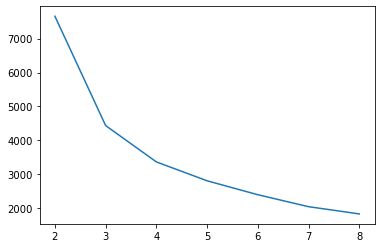

In [26]:
# elbow-curve/SSD
k=[2,3,4,5,6,7,8]
ss=[]
for x in k:
    km=KMeans(n_clusters=x,max_iter=50).fit(mf)
    ss.append(km.inertia_)
sns.lineplot(k,ss)
plt.show()

**From the above elbow curve it can be seen that from k=2 to k=3 there is a signficant reduction in the SSD (sum of squared distance) and further the rate of reduction decreases.** 
**Hence the optimal value of k is 3 (This has to be decided based on clint requirement)**

In [27]:
# Silhouette Analysis:
k=[2,3,4,5,6,7,8]
for x in k:
    km=KMeans(n_clusters=x,max_iter=50).fit(mf)
    print(f'for k={x} the silhouette_score is {silhouette_score(mf,km.labels_)}')

for k=2 the silhouette_score is 0.541842117113117
for k=3 the silhouette_score is 0.5084896296141937
for k=4 the silhouette_score is 0.4776896767524438
for k=5 the silhouette_score is 0.4659634068191317
for k=6 the silhouette_score is 0.41707885139850487
for k=7 the silhouette_score is 0.4174915003974341
for k=8 the silhouette_score is 0.4027303943788971


**Since the silhouette score for k=3 is quite acceptable, hence k=3 is used for segmentation.**

In [28]:
km=KMeans(n_clusters=3,max_iter=50).fit(mf)
mf['cluster_label']=km.labels_
mf

,amount,freq,recency,cluster_label
CustomerID,,,,
12346.0,-0.723738,-0.752888,2.301611,0
12347.0,1.731617,1.042467,-0.906466,2
12348.0,0.300128,-0.463636,-0.183658,1
12349.0,0.277517,-0.044720,-0.738141,1
12350.0,-0.533235,-0.603275,2.143188,0
...,...,...,...,...
18278.0,-0.624669,-0.683068,-0.193560,1
18280.0,-0.620853,-0.673094,1.826341,0
18281.0,-0.677696,-0.703017,0.865898,0


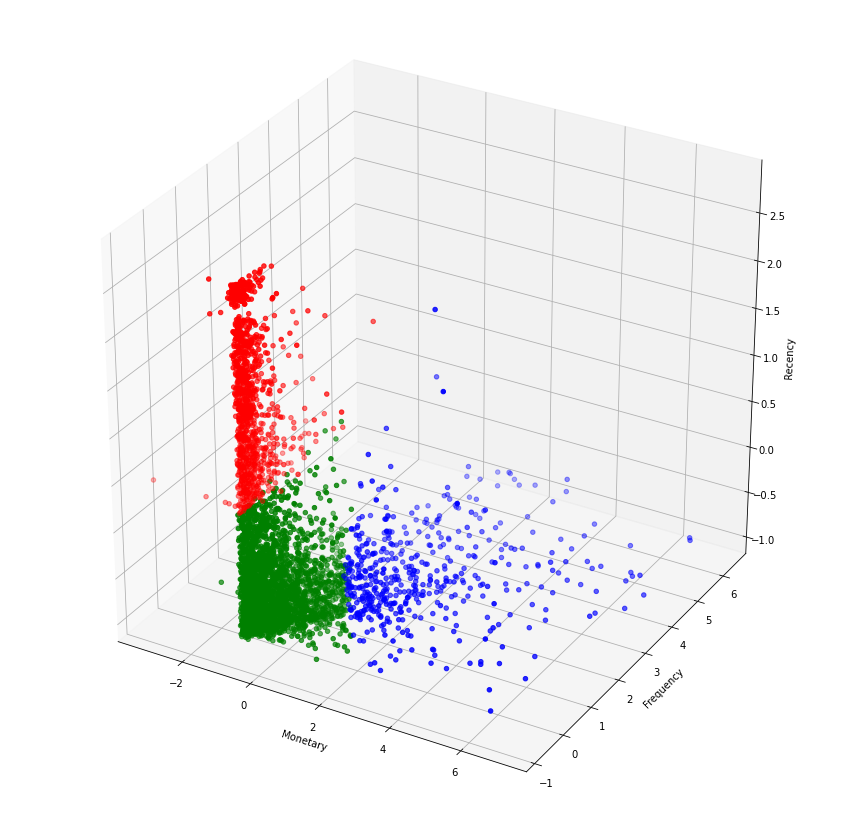

In [29]:
zero=mf[mf.cluster_label==0]
one=mf[mf.cluster_label==1]
two=mf[mf.cluster_label==2]

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=[15,15])
ax=fig.add_subplot(111,projection='3d')

x=list(zero.amount.values)
y=list(zero.freq.values)
z=list(zero.recency.values)
ax.scatter(x,y,z,c='r',marker='o')


x=list(one.amount.values)
y=list(one.freq.values)
z=list(one.recency.values)
ax.scatter(x,y,z,c='g',marker='o')


x=list(two.amount.values)
y=list(two.freq.values)
z=list(two.recency.values)
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

In [30]:
final_mf['cluster_label']=mf['cluster_label']
final_mf

,amount,freq,recency,cluster_label
CustomerID,,,,
12346.0,0.00,2,325,0
12347.0,4310.00,182,1,2
12348.0,1797.24,31,74,1
12349.0,1757.55,73,18,1
12350.0,334.40,17,309,0
...,...,...,...,...
18278.0,173.90,9,73,1
18280.0,180.60,10,277,0
18281.0,80.82,7,180,0


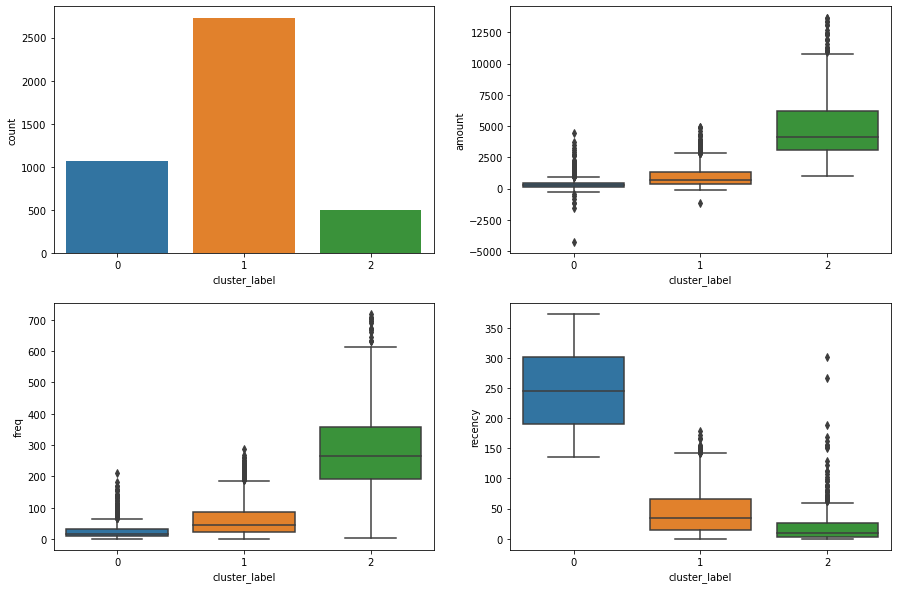

In [31]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(data=final_mf,x='cluster_label')

plt.subplot(2,2,2)
sns.boxplot(data=final_mf,x='cluster_label',y='amount')

plt.subplot(2,2,3)
sns.boxplot(data=final_mf,x='cluster_label',y='freq')

plt.subplot(2,2,4)
sns.boxplot(data=final_mf,x='cluster_label',y='recency')
plt.show()

## 2. Hierarchical Clustering:

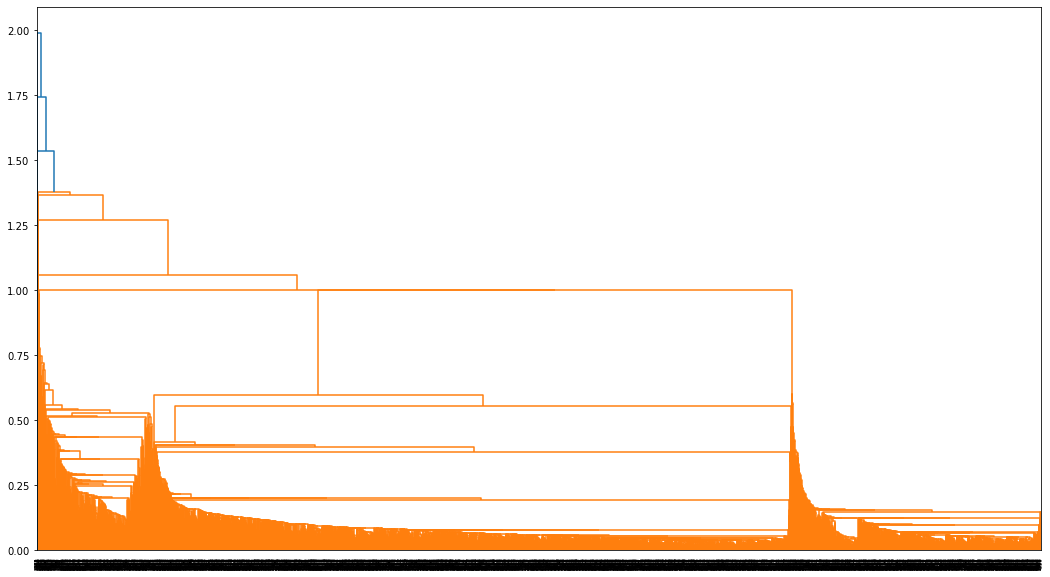

In [32]:
plt.figure(figsize=[18,10])
merging=linkage(mf,method='single')
dendrogram(merging)
plt.show()

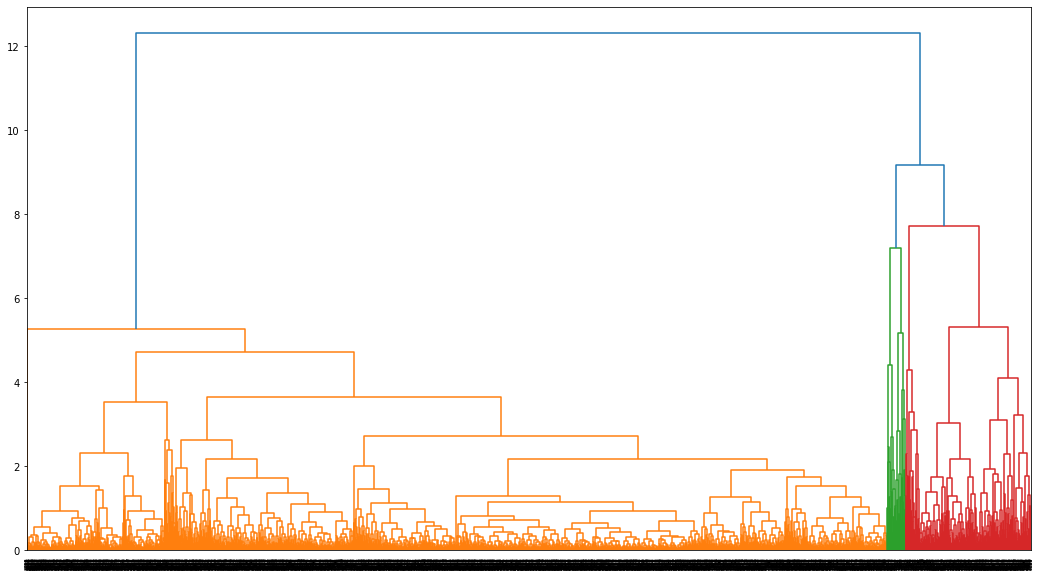

In [33]:
plt.figure(figsize=[18,10])
merging=linkage(mf,method='complete')
dendrogram(merging)
plt.show()

In [34]:
cluster_lables_h=cut_tree(merging,n_clusters=3).reshape(-1,)
mf['cluster_lables_h']=cluster_lables_h
mf

,amount,freq,recency,cluster_label,cluster_lables_h
CustomerID,,,,,
12346.0,-0.723738,-0.752888,2.301611,0,0
12347.0,1.731617,1.042467,-0.906466,2,1
12348.0,0.300128,-0.463636,-0.183658,1,0
12349.0,0.277517,-0.044720,-0.738141,1,0
12350.0,-0.533235,-0.603275,2.143188,0,0
...,...,...,...,...,...
18278.0,-0.624669,-0.683068,-0.193560,1,0
18280.0,-0.620853,-0.673094,1.826341,0,0
18281.0,-0.677696,-0.703017,0.865898,0,0


In [35]:
final_mf['cluster_lables_h']=mf['cluster_lables_h']
final_mf

,amount,freq,recency,cluster_label,cluster_lables_h
CustomerID,,,,,
12346.0,0.00,2,325,0,0
12347.0,4310.00,182,1,2,1
12348.0,1797.24,31,74,1,0
12349.0,1757.55,73,18,1,0
12350.0,334.40,17,309,0,0
...,...,...,...,...,...
18278.0,173.90,9,73,1,0
18280.0,180.60,10,277,0,0
18281.0,80.82,7,180,0,0


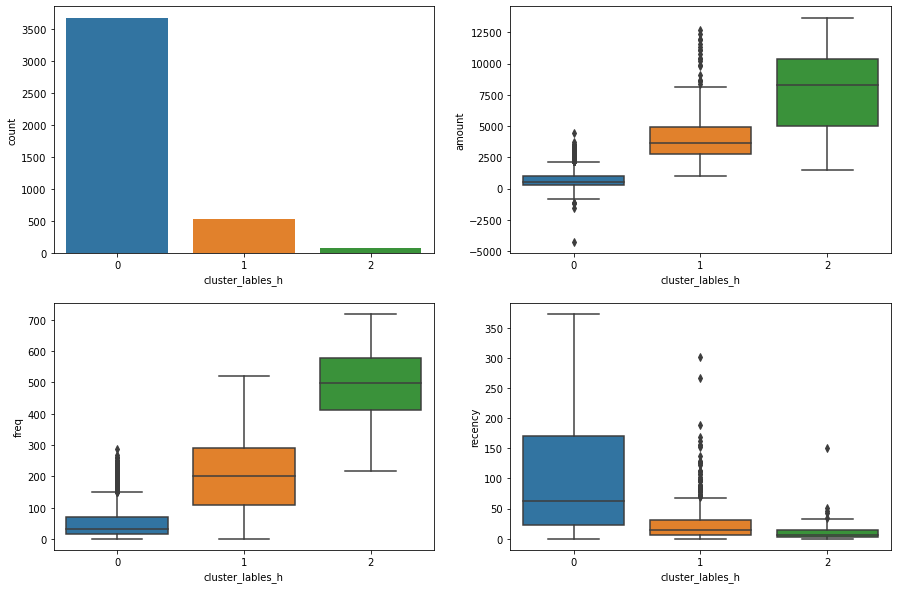

In [36]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(data=final_mf,x='cluster_lables_h')

plt.subplot(2,2,2)
sns.boxplot(data=final_mf,x='cluster_lables_h',y='amount')

plt.subplot(2,2,3)
sns.boxplot(data=final_mf,x='cluster_lables_h',y='freq')

plt.subplot(2,2,4)
sns.boxplot(data=final_mf,x='cluster_lables_h',y='recency')
plt.show()

# 3. Combination of KMeans and Hierarchical Clustering
### Now using the initial centroids from the Hierarchical Clustering to build KMeans Cluster.

In [37]:
# Average of each feature in each cluster: Assigned as initial centroid for KMeans Algorithm.
initial_centroids=pd.pivot_table(data=mf,values=['amount','freq','recency'],index='cluster_lables_h')
initial_centroids

,amount,freq,recency
cluster_lables_h,,,
0,-0.313674,-0.282609,0.114094
1,1.592519,1.315938,-0.662549
2,3.747344,4.172617,-0.804976


In [38]:
mf[['amount','freq','recency']]

,amount,freq,recency
CustomerID,,,
12346.0,-0.723738,-0.752888,2.301611
12347.0,1.731617,1.042467,-0.906466
12348.0,0.300128,-0.463636,-0.183658
12349.0,0.277517,-0.044720,-0.738141
12350.0,-0.533235,-0.603275,2.143188
...,...,...,...
18278.0,-0.624669,-0.683068,-0.193560
18280.0,-0.620853,-0.673094,1.826341
18281.0,-0.677696,-0.703017,0.865898


In [39]:
km=KMeans(n_clusters=3,init=initial_centroids,max_iter=50)
km.fit(mf[['amount','freq','recency']])

KMeans(init=                    amount      freq   recency
cluster_lables_h                              
0                -0.313674 -0.282609  0.114094
1                 1.592519  1.315938 -0.662549
2                 3.747344  4.172617 -0.804976,
       max_iter=50, n_clusters=3)

In [40]:
mf['clusters_init_h']=km.labels_
mf

,amount,freq,recency,cluster_label,cluster_lables_h,clusters_init_h
CustomerID,,,,,,
12346.0,-0.723738,-0.752888,2.301611,0,0,0
12347.0,1.731617,1.042467,-0.906466,2,1,2
12348.0,0.300128,-0.463636,-0.183658,1,0,1
12349.0,0.277517,-0.044720,-0.738141,1,0,1
12350.0,-0.533235,-0.603275,2.143188,0,0,0
...,...,...,...,...,...,...
18278.0,-0.624669,-0.683068,-0.193560,1,0,1
18280.0,-0.620853,-0.673094,1.826341,0,0,0
18281.0,-0.677696,-0.703017,0.865898,0,0,0


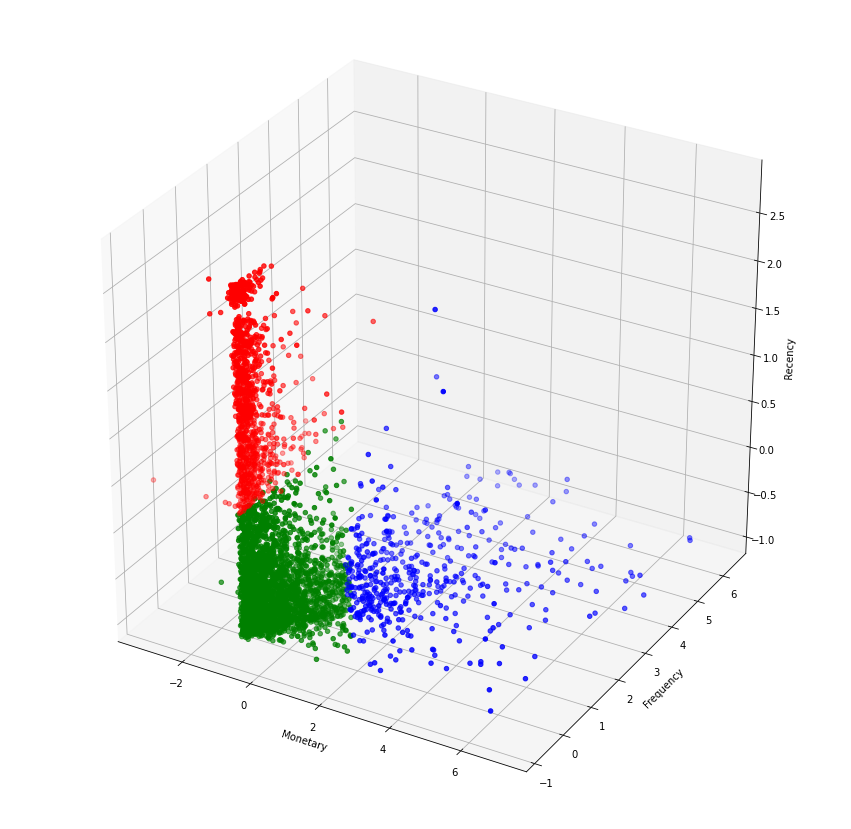

In [41]:
zero=mf[mf.clusters_init_h==0]
one=mf[mf.clusters_init_h==1]
two=mf[mf.clusters_init_h==2]

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=[15,15])
ax=fig.add_subplot(111,projection='3d')

x=list(zero.amount.values)
y=list(zero.freq.values)
z=list(zero.recency.values)
ax.scatter(x,y,z,c='r',marker='o')


x=list(one.amount.values)
y=list(one.freq.values)
z=list(one.recency.values)
ax.scatter(x,y,z,c='g',marker='o')


x=list(two.amount.values)
y=list(two.freq.values)
z=list(two.recency.values)
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.show()

In [42]:
final_mf['clusters_init_h']=mf['clusters_init_h']
final_mf

,amount,freq,recency,cluster_label,cluster_lables_h,clusters_init_h
CustomerID,,,,,,
12346.0,0.00,2,325,0,0,0
12347.0,4310.00,182,1,2,1,2
12348.0,1797.24,31,74,1,0,1
12349.0,1757.55,73,18,1,0,1
12350.0,334.40,17,309,0,0,0
...,...,...,...,...,...,...
18278.0,173.90,9,73,1,0,1
18280.0,180.60,10,277,0,0,0
18281.0,80.82,7,180,0,0,0


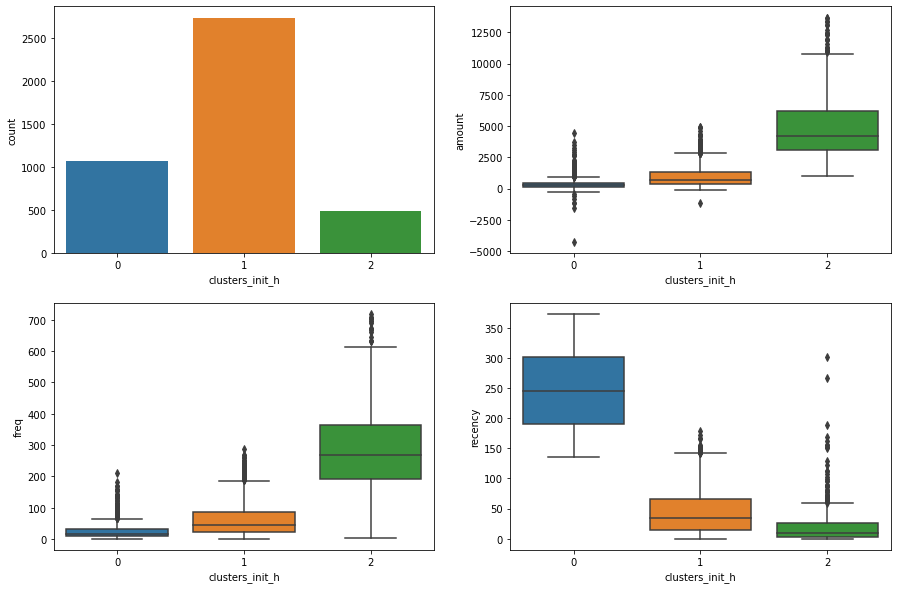

In [43]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.countplot(data=final_mf,x='clusters_init_h')

plt.subplot(2,2,2)
sns.boxplot(data=final_mf,x='clusters_init_h',y='amount')

plt.subplot(2,2,3)
sns.boxplot(data=final_mf,x='clusters_init_h',y='freq')

plt.subplot(2,2,4)
sns.boxplot(data=final_mf,x='clusters_init_h',y='recency')
plt.show()

### **The following inferences can be drawn from the above clustering analysis:**
- **The heighest number of customers belong to cluster 1, followed by cluster 0.**
- **Heighest amount is spent by the customers belonging to cluster 2, followed by cluster 1.**
- **The customers having heighest frequency of orders belong to cluster 2, followed by cluster 1.**
- **Relatively the most recent order is placed by the customers belonging to cluster 2, followed by cluster 1.**
- **Hence in all we can conclude that the customers from cluster 2 are the most valuable customers to the company, followed by      customers from cluster 1.**
    